In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import metrics

In [113]:
saleryDataSet=pd.read_csv("Salary_Data.csv")

In [114]:
saleryDataSet.columns

Index(['YearsExperience', 'Salary'], dtype='str')

plot graph to see salery vs experance 

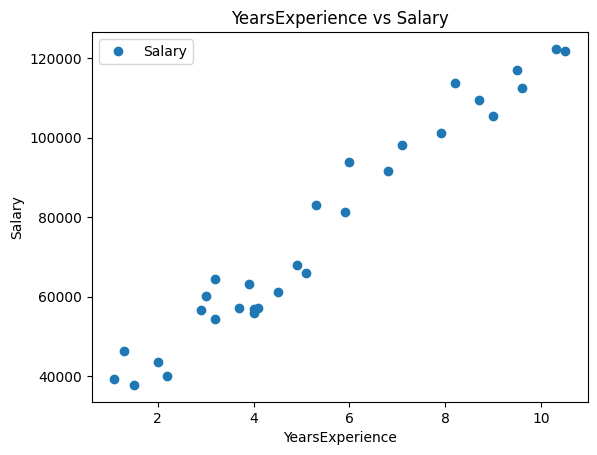

In [115]:
saleryDataSet.plot(x='YearsExperience', y='Salary', style='o')  
plt.title('YearsExperience vs Salary')  
plt.xlabel('YearsExperience')  
plt.ylabel('Salary')  
plt.show()

use leniar regression on this data set to split in 80 to 20 ratio and train model to get experiance

In [116]:
# creating x and y variables. these should be tuples of 2d array
X = saleryDataSet['YearsExperience'].values.reshape(-1,1)  # this is input bvalue based on this y value is trained
Y = saleryDataSet['Salary'].values.reshape(-1,1) # this is value that is going to be predicted

creating traing data set

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [118]:
# intilizing model
model = LinearRegression()
# traing model using fit method where first parameter is
#  area YearsExperience
#  and second is list of prices 
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


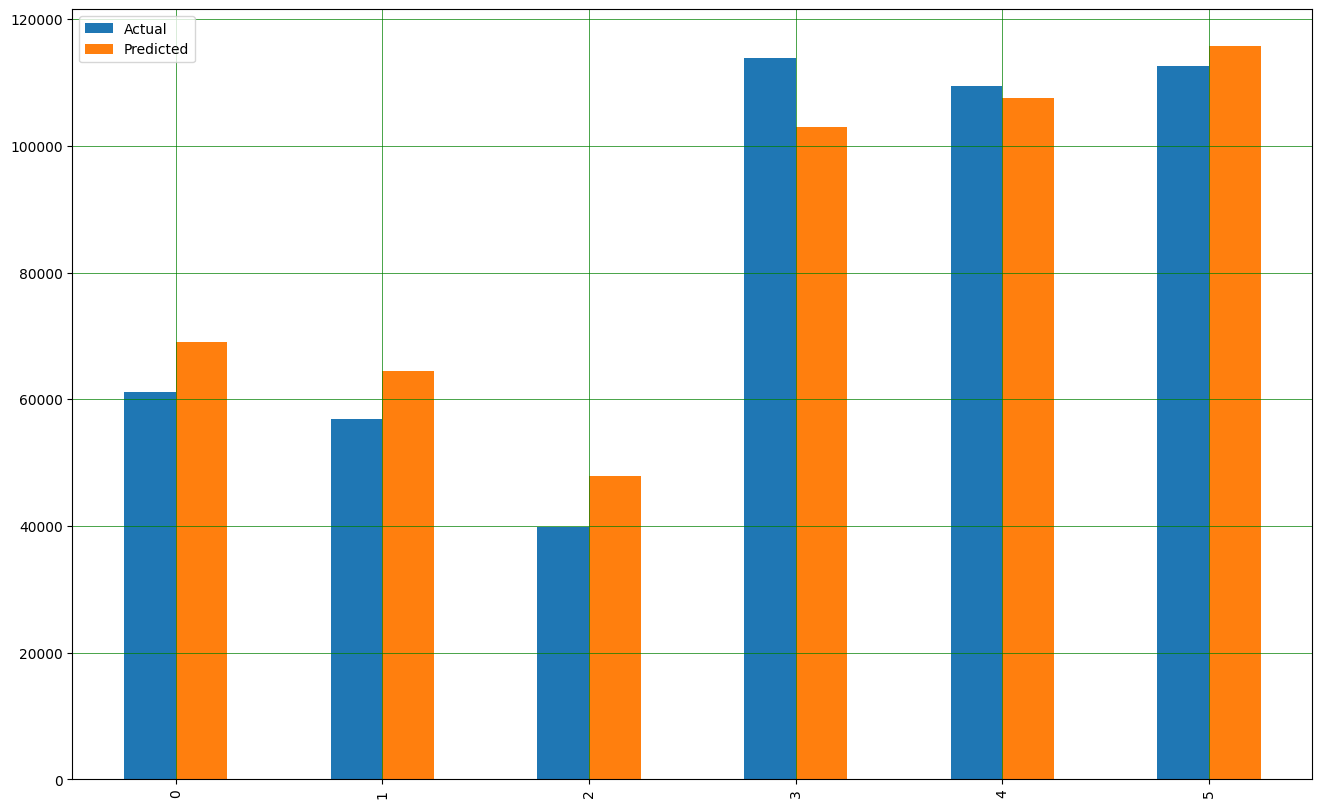

In [119]:
# test predection with test values of data set
y_pred = model.predict(x_test)
# check with graph to see how model performed
predectedValues = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
predectedValues = predectedValues.head(25)
predectedValues.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

check model scores

In [120]:
from sklearn.metrics import r2_score

# Make predictions on the TEST set (data the model hasn't seen)
y_pred_r2 = model.predict(np.array(x_test).reshape(-1, 1))

# Compare predictions vs actual values
score = r2_score(y_test, y_pred_r2)

print(f"Model Accuracy (R²): {score:.2f}")

Model Accuracy (R²): 0.94


In [121]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f"Average Error: ${mae:,.2f}")
# Example output: "Average Error: $45,000.00" 
# (Means your predictions are usually off by about $45k)

Average Error: $6,551.66


In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6551.660507667482
Mean Squared Error: 52382391.654782675
Root Mean Squared Error: 7237.568076003339


# Tasks

## Calculate and print Slope (Coefficient) and Intercept

In [123]:
# Extract and print all Coefficients
coefficients = model.coef_.flatten()

# as there is only one featrer i.e YearsExperience there is only one cooeficient(means how much it effects the predection value)
for i, coef in enumerate(coefficients):
    print(f"Coefficient for feature {i} (Slope): {coef}")

# Print Intercept 
# this is bias of system  
print(f"Intercept (Bias): {model.intercept_[0]}")

Coefficient for feature 0 (Slope): 9168.568101326062
Intercept (Bias): 27743.91575074813


## Plot data points with the Regression Line overlay.

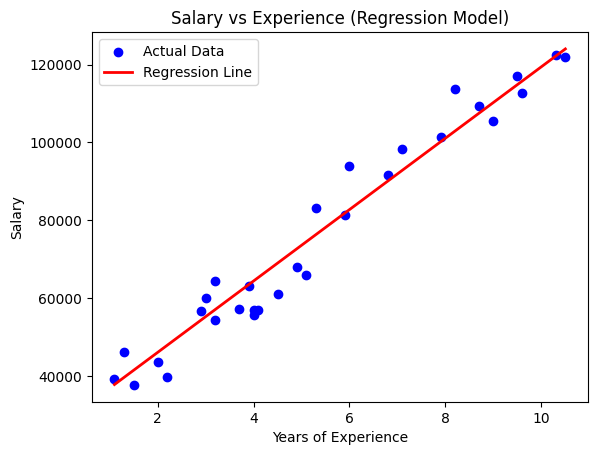

In [124]:
# 1. Scatter plot of the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')

# 2. Plot the regression line
# We use X and the model's predictions for those X values
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# 3. Labeling
plt.title('Salary vs Experience (Regression Model)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Predict salary for 12 years of experience.

In [125]:
print('Salery for 12 years experance is' , model.predict([[12]]))

Salery for 12 years experance is [[137766.73296666]]


# Linear Regression using multipe parameters

In [126]:
housing = pd.read_csv('housing.csv')
housing.drop('Address',axis=1,inplace=True)
housing.rename(columns={'Avg. Area Income': 'Area Income', 'Avg. Area House Age': 'House Age','Avg. Area Number of Rooms':'Number of Rooms',"Avg. Area Number of Bedrooms":"Number of Bedrooms"},inplace=True)

In [127]:
#cleaning data
housing['Area Income']=housing['Area Income'].astype('int')
housing['House Age']=housing['House Age'].astype('int')
housing['Number of Rooms']=housing['Number of Rooms'].astype('int')
housing['Number of Bedrooms']=housing['Number of Bedrooms'].astype('int')
housing['Area Population']=housing['Area Population'].astype('int')
# feature engineering
housing['Area Income Category'] = pd.qcut(housing['Area Income'],3,labels=['Low','Medium','High'])
housing['Area Population Category'] = pd.qcut(housing['Area Population'],3,labels=['Low','Medium','High'])
housing['House Size'] = pd.qcut(housing['Number of Rooms'],3,labels=['Small','Medium','Large'])


In [128]:
X = housing[['Area Income', 'House Age', 'Number of Rooms']].values
Y = housing['Price'].values

In [129]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [130]:
# intilizing model
model = LinearRegression()
# traing model using fit method where first parameter is
#  'Area Income', 'House Age', 'Number of Rooms'
#  and second is list of prices 
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


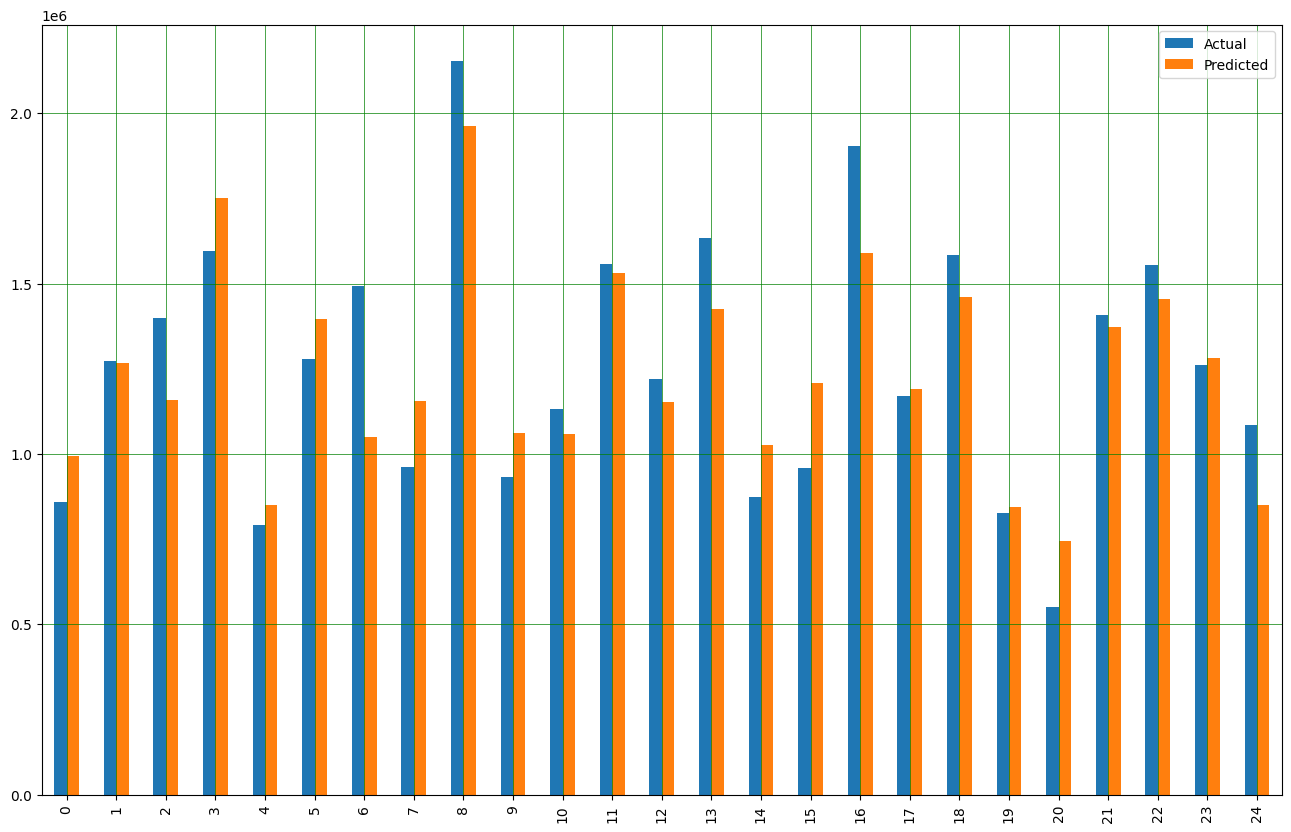

In [131]:
# test predection with test values of data set
y_pred = model.predict(x_test)
# check with graph to see how model performed
predectedValues = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
predectedValues = predectedValues.head(25)
predectedValues.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [132]:
print('price of house',model.predict([[100000, 10, 4]]))

price of house [2307597.15272997]


In [133]:
# Extract and print all Coefficients
coefficients = model.coef_.flatten()

# as there is only one featrer i.e YearsExperience there is only one cooeficient(means how much it effects the predection value)
for i, coef in enumerate(coefficients):
    print(f"Coefficient for feature {i} (Slope): {coef}")

# Print Intercept 
# this is bias of system  
print(f"Intercept (Bias): {model.intercept_}")

Coefficient for feature 0 (Slope): 21.235141891105368
Coefficient for feature 1 (Slope): 152031.4463677059
Coefficient for feature 2 (Slope): 112753.16420906027
Intercept (Bias): -1787244.1568938694


In [134]:
from sklearn.metrics import r2_score

# Make predictions on the TEST set (data the model hasn't seen)
y_pred_r2 = model.predict(x_test)

# Compare predictions vs actual values
score = r2_score(y_test, y_pred_r2)

print(f"Model Accuracy (R²): {score:.2f}")

Model Accuracy (R²): 0.71


In [135]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f"Average Error: ${mae:,.2f}")
# Example output: "Average Error: $45,000.00" 
# (Means your predictions are usually off by about $45k)

Average Error: $149,944.74


In [136]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 149944.7411698894
Mean Squared Error: 35569412023.84103
Root Mean Squared Error: 188598.54724742984
